### Building a Boolean-Based Model

This simple example demonstrates how to create a boolean-based model, its components, regulators, conditions and sub-conditions into [Cell Collective](https://cellcollective.org).

We'll attempt to reconstruct the [Cortical Area Development](https://research.cellcollective.org/?dashboard=true#2035:1/cortical-area-development/1) authored by CE Giacomantonio.

![](data/images/cortical-area-development.png)

Begin by importing the ccapi module into your workspace.

In [1]:
import ccapi

Now, let’s try creating a client object in order to interact with services provided by [Cell Collective](https://cellcollective.org).

In [2]:
client = ccapi.Client()

In [3]:
client.auth(email = "test@cellcollective.org", password = "test")

#### Creating a Base Model

Create a Base Model using ccapi and instantize it with an authenticated client.

In [4]:
model = ccapi.Model("Cortical Area Development", client = client)
model.save()

ID,81100
Name,Cortical Area Development
Memory Address,0x0107731310
Number of Versions,1
Versions,[<BooleanModel 81100 at 0x0107757150>]


A `ccapi.Model` consists of various `ccapi.ModelVersion` objects that help you build various versions to a model. By default, a `ccapi.Model` provides you a default model version of a boolean type. 

In [5]:
# get the default model version
boolean      = model.versions[0]
boolean.name = "Version 1"
boolean

ID,81100
Version,1
Name,Version 1
Memory Address,0x0107757150
Number of Components,0
Components,


#### Adding Components to a Boolean-Based Model

First, we need to create a list of component objects for this model.

In [6]:
# create components
COUP_TFI = ccapi.InternalComponent("COUP-TFI")
EMX2     = ccapi.InternalComponent("EMX2")
FGF8     = ccapi.InternalComponent("FGF8")
PAX6     = ccapi.InternalComponent("PAX6")
Sp8      = ccapi.InternalComponent("Sp8")

Now let us add a list of components to our Boolean Model.

In [7]:
# add components to model
boolean.add_components(COUP_TFI, EMX2, FGF8, PAX6, Sp8)

#### Saving a Model

Ensure you save your model in order to commit your work.

In [8]:
model.save()

ID,81100
Name,Cortical Area Development
Memory Address,0x0107731310
Number of Versions,1
Versions,[<BooleanModel 81100 at 0x0107757150 name='Version 1'>]


#### Adding Regulators, Conditions and Sub-Conditions

Let's add a list of regulators and conditions to our components. A list of regulators and conditions as well as sub-conditions can all be added at once to a component.

In [9]:
# add regulators to components
COUP_TFI.add_regulators(
    ccapi.NegativeRegulator(Sp8),
    ccapi.NegativeRegulator(FGF8)
)
EMX2.add_regulators(
    ccapi.PositiveRegulator(COUP_TFI),
    ccapi.NegativeRegulator(FGF8),
    ccapi.NegativeRegulator(PAX6),
    ccapi.NegativeRegulator(Sp8)
)
Sp8.add_regulators(
    ccapi.PositiveRegulator(FGF8),
    ccapi.NegativeRegulator(EMX2)
)
FGF8.add_regulators(
    # add conditions to regulators
    ccapi.PositiveRegulator(FGF8, conditions = [
        ccapi.Condition(components = Sp8)
    ])
)
PAX6.add_regulators(
    ccapi.PositiveRegulator(Sp8),
    ccapi.NegativeRegulator(COUP_TFI)
)

In [10]:
model.save()

ID,81100
Name,Cortical Area Development
Memory Address,0x0107731310
Number of Versions,1
Versions,[<BooleanModel 81100 at 0x0107757150 name='Version 1'>]


We've now got things within our Boolean Model.

In [11]:
boolean.components

ID,Name,Number of Positive Regulators,Number of Negative Regulators
1741873,COUP-TFI,0,2
1741876,EMX2,1,3
1741877,FGF8,1,0
1741874,PAX6,1,1
1741875,Sp8,1,1


#### Model Summary

You can view detailed summary of your model using the `summary` function provided.

In [14]:
boolean.summary()

Internal Components (+, -) External Components
-------------------------- -------------------
COUP-TFI (0,2)             
EMX2 (1,3)                 
FGF8 (1,0)                 
PAX6 (1,1)                 
Sp8 (1,1)                  


#### Model Rendering

You can also attempt to visualize a Boolean Model using the `draw` function provided.

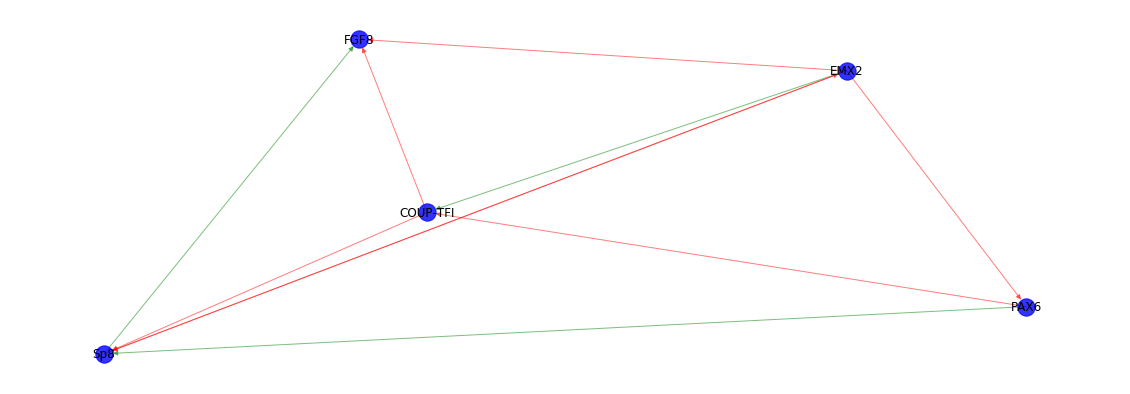

In [16]:
import matplotlib.pyplot as pplt

pplt.figure(figsize = (20, 7))
pplt.axis('off')

boolean.draw()